<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: José Alvarado Espinoza</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

In [3]:
!pip install librosa

In [4]:
!pip install torchaudio

In [5]:
!pip install torch

### 0. Cargamos audio de la actividad 5

In [7]:
""" Descargaremos el audio desde el github para asegurarnos de trabajar con los datos correctos"""

import requests

url = "https://github.com/kationj/EIE-401JEAE_Actividades/raw/main/Actividad_5/Audio_Actividad_5.wav"
archivo_destino = "Audio_Actividad_5.wav"

respuesta = requests.get(url)
if respuesta.status_code == 200:
    with open(archivo_destino, 'wb') as archivo:
        archivo.write(respuesta.content)
    print("Archivo descargado exitosamente como", archivo_destino)
else:
    print("Error al descargar el archivo:", respuesta.status_code) #status_code nos avisara que tipo de error se realizo


Archivo descargado exitosamente como Audio_Actividad_5.wav


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como: 
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate 
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

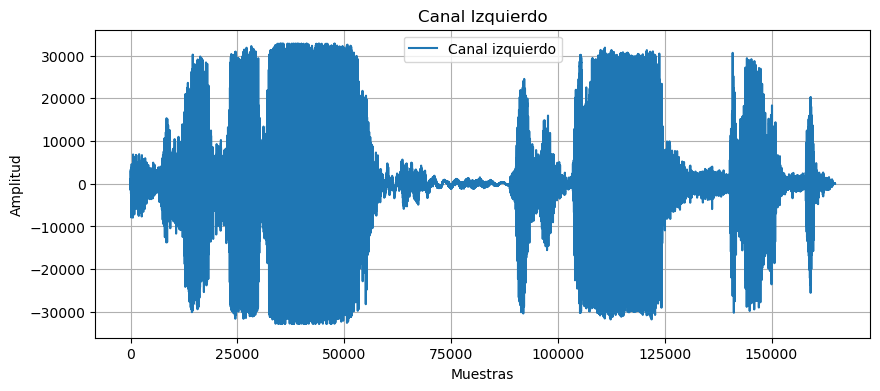

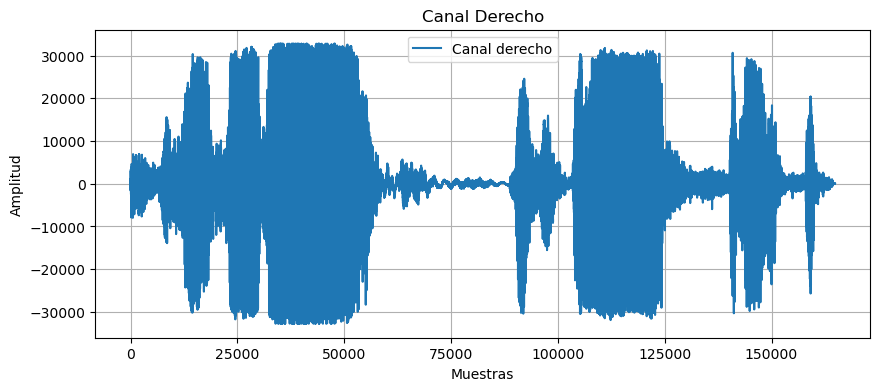

In [9]:
import librosa
import torch
import matplotlib.pyplot as plt
import numpy as np
import wave

# Nombre del archivo .wav
archivo_wav = "Audio_Actividad_5.wav" # Archivo estereo sacao de un clip 
# Abrir el archivo .wav en modo lectura
with wave.open(archivo_wav, "rb") as archivo:
    # Obtener los parámetros del archivo .wav
    frame_rate = archivo.getframerate() # Frecuencia de muestreo
    n_frames = archivo.getnframes()     # Numero de muestras
    n_channels = archivo.getnchannels() # Numero de canales 1 = mono, 2 = Estereo

    # Leer todos los frames del archivo .wav y convertirlos a un arreglo de números
    frames = np.frombuffer(archivo.readframes(n_frames), dtype=np.int16)

# Si hay dos canales, dividimos los datos en dos arreglos separados
if n_channels == 2:
    canal_izquierdo = frames[::2]
    canal_derecho = frames[1::2]

    # Graficar el canal izquierdo
    plt.figure(figsize=(10, 4))
    plt.plot(canal_izquierdo, label='Canal izquierdo')
    plt.title("Canal Izquierdo")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar el canal derecho
    plt.figure(figsize=(10, 4))
    plt.plot(canal_derecho, label='Canal derecho')
    plt.title("Canal Derecho")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("El archivo no está grabado en estéreo.")

In [10]:
# Calculo de media 

# Media con numpy
media_audio_izquierdo = np.mean(canal_izquierdo)
media_audio_derecho = np.mean(canal_derecho)
print("Media con Numpy")
print(media_audio_izquierdo)
print(media_audio_derecho)


# Media con librosa
# Cargar el archivo de audio
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Dividir los canales
canal_izquierdo_librosa = audio[0]
canal_derecho_librosa = audio[1]

# Calcular la media de cada canal
media_audio_izquierdo_librosa = canal_izquierdo_librosa.mean()
media_audio_derecho_librosa = canal_derecho_librosa.mean()

print("Media con librosa")
print(media_audio_izquierdo_librosa)
print(media_audio_derecho_librosa)

#Media con Pytorch
# Convertir los datos de los canales a tensores de PyTorch de tipo flotante
tensor_canal_izq = torch.tensor(canal_izquierdo, dtype=torch.float32)
tensor_canal_der = torch.tensor(canal_derecho, dtype=torch.float32)

# Calcular la media del canal izquierdo
media_canal_izq = torch.mean(tensor_canal_izq).item()

# Calcular la media del canal derecho
media_canal_der = torch.mean(tensor_canal_der).item()

print("Media con Pytorch")
print(media_canal_izq)
print(media_canal_der)

Media con Numpy
77.99245438664596
82.49130798718944
Media con librosa
0.002380172
0.0025174671
Media con Pytorch
77.9924545288086
82.4913101196289


Para el calculo de la media se pueden utilizar las 3 librerias sin embargo a pesar de que tanto pytorch como numpy dan resultados similares vemos que librosa no, esto puede deberse a como manejan los datos por debajo quizas normalizando estos.

In [12]:
from scipy.stats import kurtosis

# Calcular la kurtosis para el canal izquierdo
kurtosis_izquierdo = kurtosis(canal_izquierdo)

# Calcular la kurtosis para el canal derecho
kurtosis_derecho = kurtosis(canal_derecho)

print("Kurtosis del canal izquierdo:", kurtosis_izquierdo)
print("Kurtosis del canal derecho:", kurtosis_derecho)

# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', sr=None, mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Calcular la kurtosis para cada canal
kurtosis_canal_1 = kurtosis(canal_1)
kurtosis_canal_2 = kurtosis(canal_2)

print("Kurtosis del canal izquierdo:", kurtosis_canal_1)
print("Kurtosis del canal derecho:", kurtosis_canal_2)

Kurtosis del canal izquierdo: 1.227704478040656
Kurtosis del canal derecho: 1.2216850824956325
Kurtosis del canal izquierdo: 1.2277039899241204
Kurtosis del canal derecho: 1.2216849423351421


In [13]:
# https://discuss.pytorch.org/t/statistics-for-whole-dataset/74511

import torch
import librosa
import numpy as np

# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Convertir los arrays de NumPy a tensores de PyTorch 

tensor_canal_1 = torch.from_numpy(canal_1).float()
tensor_canal_2 = torch.from_numpy(canal_2).float()

# Calcular la media y la desviación estándar para cada canal
media_canal_1 = torch.mean(tensor_canal_1)
media_canal_2 = torch.mean(tensor_canal_2)
diffs_canal_1 = tensor_canal_1 - media_canal_1
diffs_canal_2 = tensor_canal_2 - media_canal_2
var_canal_1 = torch.mean(torch.pow(diffs_canal_1, 2.0))
var_canal_2 = torch.mean(torch.pow(diffs_canal_2, 2.0))
std_canal_1 = torch.pow(var_canal_1, 0.5)
std_canal_2 = torch.pow(var_canal_2, 0.5)

# Calcular los z-scores para cada canal
zscores_canal_1 = diffs_canal_1 / std_canal_1
zscores_canal_2 = diffs_canal_2 / std_canal_2

# Calcular la asimetría para cada canal
skewness_canal_1 = torch.mean(torch.pow(zscores_canal_1, 3.0))
skewness_canal_2 = torch.mean(torch.pow(zscores_canal_2, 3.0))

# Calcular la curtosis para cada canal
kurtosis_canal_1 = torch.mean(torch.pow(zscores_canal_1, 4.0)) - 3.0
kurtosis_canal_2 = torch.mean(torch.pow(zscores_canal_2, 4.0)) - 3.0


print("Media del canal 1:", media_canal_1)
print("Media del canal 2:", media_canal_2)
print("Asimetría del canal 1:", skewness_canal_1.item())
print("Asimetría del canal 2:", skewness_canal_2.item())
print("kurtosis del canal 1:", kurtosis_canal_1.item())
print("kurtosis del canal 2:", kurtosis_canal_2.item())

Media del canal 1: tensor(0.0024)
Media del canal 2: tensor(0.0025)
Asimetría del canal 1: -0.01958797685801983
Asimetría del canal 2: -0.017139354720711708
kurtosis del canal 1: 1.2293806076049805
kurtosis del canal 2: 1.2233543395996094


La kurtosis es una media estadistica que corresponde a la distribucion de los datos, nos indicara que forma tendran los bordes de
la campana de gauss, numpy pytorch y librosa no tienen un metodo directo para calcularse sin embargo scipy si es por esto que compararemos los
datos con esta libreria y realizaremos el calculo a traves de su formula en lugar de usar el llamado de una función, para esto necesitaremos la desviación,
la media, la asimetría (Sweknees)que corresponde a que lado de la media se distribuyen los datos y una vez con todo calculado podemos calcular 
la Kurtosis de cada canal.

In [15]:
"Zero Crossing Rate"

# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Calcular la tasa de cruce por cero para cada canal
tasa_cruce_por_cero_canal_1 = librosa.feature.zero_crossing_rate(canal_1)
tasa_cruce_por_cero_canal_2 = librosa.feature.zero_crossing_rate(canal_2)

# Promedio de la tasa de cruce por cero sobre todas las ventanas para cada canal
tasa_promedio_cruce_por_cero_canal_1 = tasa_cruce_por_cero_canal_1.mean()
tasa_promedio_cruce_por_cero_canal_2 = tasa_cruce_por_cero_canal_2.mean()

print("Tasa promedio de cruce por cero para el canal 1:", tasa_promedio_cruce_por_cero_canal_1)
print("Tasa promedio de cruce por cero para el canal 2:", tasa_promedio_cruce_por_cero_canal_2)


Tasa promedio de cruce por cero para el canal 1: 0.09478684413580248
Tasa promedio de cruce por cero para el canal 2: 0.09468135127314815


el Zero Crossing Rate define la cantidad de veces que la señal tiene un cambio de polaridad.
El ZCR es útil en varias aplicaciones, como la clasificación de género musical, la detección de habla y la segmentación de señales de audio.

In [17]:
"Spectral Centroid"
# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Calcular el espectrograma de potencia para cada canal
espectrograma_canal_1 = librosa.feature.melspectrogram(y=audio[0], sr=sr)
espectrograma_canal_2 = librosa.feature.melspectrogram(y=audio[1], sr=sr)

# Calcular el centroide espectral para cada canal
centroide_canal_1 = librosa.feature.spectral_centroid(S=espectrograma_canal_1)
centroide_canal_2 = librosa.feature.spectral_centroid(S=espectrograma_canal_2)

# Promediar los centroides espectrales sobre todas las ventanas
centroide_promedio_canal_1 = centroide_canal_1.mean()
centroide_promedio_canal_2 = centroide_canal_2.mean()

print("Centroide espectral promedio para el canal 1:", centroide_promedio_canal_1)
print("Centroide espectral promedio para el canal 2:", centroide_promedio_canal_2)

Centroide espectral promedio para el canal 1: 2009.0509838064409
Centroide espectral promedio para el canal 2: 2008.897888734277


El Spectral Centroid es una medida que proporciona información sobre la distribución de frecuencias en una señal de audio, calculando la frecuencia promedio ponderada de la señal. Se utiliza para caracterizar el contenido espectral y el timbre de una señal de audio.

In [19]:
"Energia"
# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Calcular la energía de cada canal en el dominio del tiempo
energia_tiempo_canal_1 = sum(canal_1**2)
energia_tiempo_canal_2 = sum(canal_2**2)

print("Energía del canal 1 en el dominio del tiempo:", energia_tiempo_canal_1)
print("Energía del canal 2 en el dominio del tiempo:", energia_tiempo_canal_2)

Energía del canal 1 en el dominio del tiempo: 12140.84801802985
Energía del canal 2 en el dominio del tiempo: 12157.071796355385


In [20]:
"RMSE"

# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Valor predichos para este caso la media
valores_predichos_canal_1 = media_audio_izquierdo
valores_predichos_canal_2 = media_audio_derecho

# Calcular el RMSE para cada canal
rmse_canal_1 = np.sqrt(np.mean((canal_1 - valores_predichos_canal_1) ** 2))
rmse_canal_2 = np.sqrt(np.mean((canal_2 - valores_predichos_canal_2) ** 2))

# Tomar el promedio de los dos valores de RMSE
rmse_promedio = (rmse_canal_1 + rmse_canal_2) / 2

print("RMSE para el canal 1:", rmse_canal_1)
print("RMSE para el canal 2:", rmse_canal_2)
print("RMSE promedio de los dos canales:", rmse_promedio)

RMSE para el canal 1: 77.99102
RMSE para el canal 2: 82.48969
RMSE promedio de los dos canales: 80.2403564453125


In [21]:
"RMSE"

# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Valor predichos para este caso el canal contrario
valores_predichos_canal_1 = canal_2
valores_predichos_canal_2 = canal_1

# Calcular el RMSE para cada canal
rmse_canal_1 = np.sqrt(np.mean((canal_1 - valores_predichos_canal_1) ** 2))
rmse_canal_2 = np.sqrt(np.mean((canal_2 - valores_predichos_canal_2) ** 2))

# Tomar el promedio de los dos valores de RMSE
rmse_promedio = (rmse_canal_1 + rmse_canal_2) / 2

print("RMSE para el canal 1:", rmse_canal_1)
print("RMSE para el canal 2:", rmse_canal_2)
print("RMSE promedio de los dos canales:", rmse_promedio)

RMSE para el canal 1: 0.0030725587
RMSE para el canal 2: 0.0030725587
RMSE promedio de los dos canales: 0.003072558669373393


In [22]:
"Frecuencia Fundamental"
# Cargar el archivo de audio estéreo
audio, sr = librosa.load('Audio_Actividad_5.wav', mono=False)

# Separar los canales
canal_1 = audio[0]  # Primer canal
canal_2 = audio[1]  # Segundo canal

# Calcular la transformada de Fourier de cada canal
fft_canal_1 = np.fft.fft(canal_1)
fft_canal_2 = np.fft.fft(canal_2)

# Encontrar la frecuencia fundamental (bin de frecuencia dominante)
frecuencia_fundamental_canal_1 = np.argmax(np.abs(fft_canal_1))
frecuencia_fundamental_canal_2 = np.argmax(np.abs(fft_canal_2))

print("Frecuencia fundamental del canal 1:", frecuencia_fundamental_canal_1)
print("Frecuencia fundamental del canal 2:", frecuencia_fundamental_canal_2)

Frecuencia fundamental del canal 1: 2125
Frecuencia fundamental del canal 2: 80307


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512. 


In [24]:
import torchaudio
import torch

# Cargar el archivo de audio
waveform, sample_rate = torchaudio.load('Audio_Actividad_5.wav')

# Especificar los tamaños de FFT deseados
tamanos_fft = [32, 128, 512]

# Calcular el espectrograma para cada tamaño de FFT
espectrogramas = []
for n_fft in tamanos_fft:
    # Calcular el espectrograma
    espectrograma = torchaudio.transforms.Spectrogram(n_fft=n_fft)(waveform)
    espectrogramas.append(espectrograma)

# Convertir los espectrogramas a tensores de PyTorch
espectrogramas_tensor = [torch.squeeze(espectrograma, 0) for espectrograma in espectrogramas]

# Mostrar la forma de cada espectrograma
for i, espectrograma in enumerate(espectrogramas_tensor):
    print(f"Espectrograma para n_fft={tamanos_fft[i]}: {espectrograma.shape}") 

Espectrograma para n_fft=32: torch.Size([2, 17, 10305])
Espectrograma para n_fft=128: torch.Size([2, 65, 2577])
Espectrograma para n_fft=512: torch.Size([2, 257, 645])


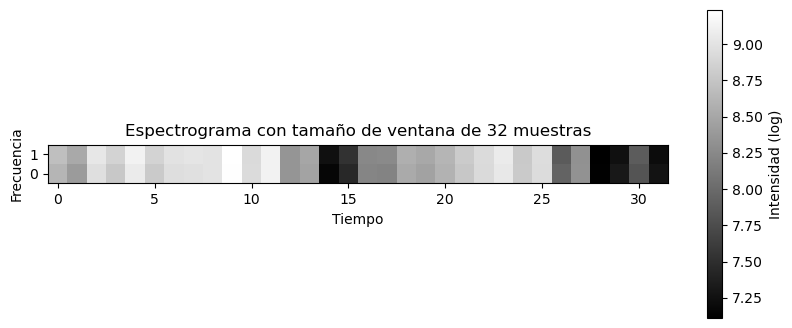

In [25]:
# Cargar el archivo de audio
waveform, sample_rate = torchaudio.load('Audio_Actividad_5.wav')

# Calcular la transformada rápida de Fourier (FFT)
fft_result = torch.fft.fft(waveform, dim=1)

# Tomar el valor absoluto para obtener la magnitud del espectro
fft_magnitude = torch.abs(fft_result)

# Seleccionar las primeras 32 muestras para el espectrograma
espectrograma = fft_magnitude[:, :32]

# Graficar el espectrograma
plt.figure(figsize=(10, 4))
plt.imshow(espectrograma.log2().numpy(), cmap='gray', origin='lower')
plt.title('Espectrograma con tamaño de ventana de 32 muestras')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.colorbar(label='Intensidad (log)')
plt.show()

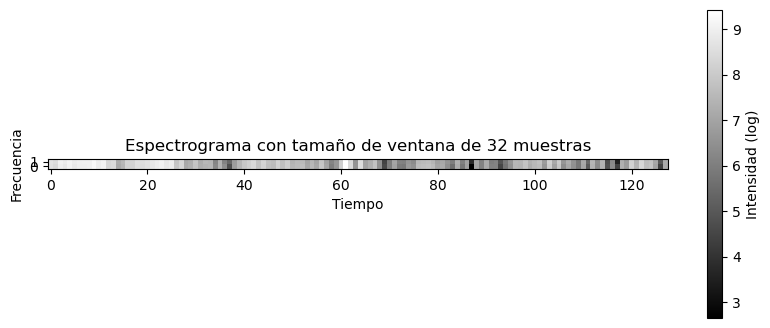

In [26]:
# Cargar el archivo de audio
waveform, sample_rate = torchaudio.load('Audio_Actividad_5.wav')

# Calcular la transformada rápida de Fourier (FFT)
fft_result = torch.fft.fft(waveform, dim=1)

# Tomar el valor absoluto para obtener la magnitud del espectro
fft_magnitude = torch.abs(fft_result)

# Seleccionar las primeras 32 muestras para el espectrograma
espectrograma = fft_magnitude[:, :128]

# Graficar el espectrograma
plt.figure(figsize=(10, 4))
plt.imshow(espectrograma.log2().numpy(), cmap='gray', origin='lower')
plt.title('Espectrograma con tamaño de ventana de 32 muestras')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.colorbar(label='Intensidad (log)')
plt.show()

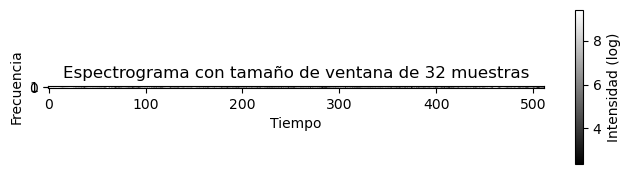

In [27]:
# Cargar el archivo de audio
waveform, sample_rate = torchaudio.load('Audio_Actividad_5.wav')

# Calcular la transformada rápida de Fourier (FFT)
fft_result = torch.fft.fft(waveform, dim=1)

# Tomar el valor absoluto para obtener la magnitud del espectro
fft_magnitude = torch.abs(fft_result)

# Seleccionar las primeras 32 muestras para el espectrograma
espectrograma = fft_magnitude[:, :512]

# Graficar el espectrograma
plt.figure(figsize=(8, 2))

# Ajustar los límites de los ejes x e y


plt.imshow(espectrograma.log2().numpy(), cmap='gray', origin='lower')
plt.title('Espectrograma con tamaño de ventana de 32 muestras')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.colorbar(label='Intensidad (log)')
plt.show()

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


In [29]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

sample_rate, audio = wavfile.read("Audio_Actividad_5.wav")
audio = audio[:,0] #stereo to only one channel
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 3.7384126984126986s


C:\Users\Jose\AppData\Local\Temp\ipykernel_2032\2274550910.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read("Audio_Actividad_5.wav")


In [30]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

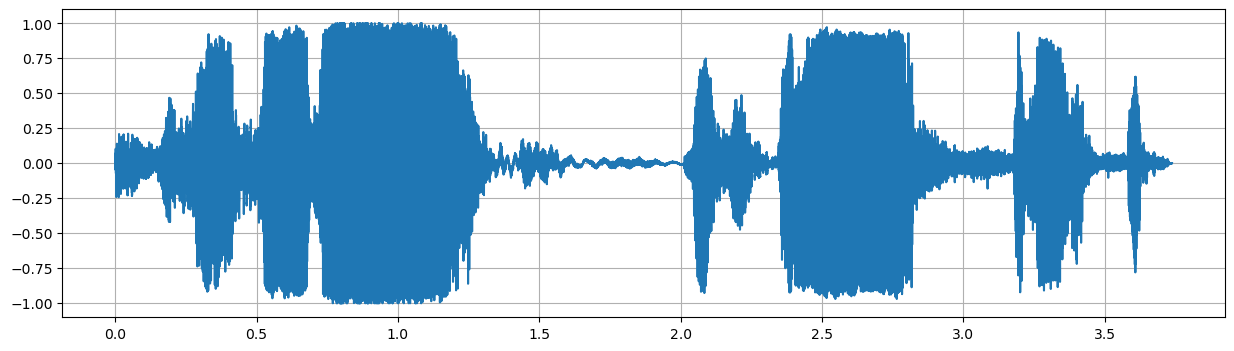

In [31]:
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [32]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [33]:
hop_size = 15 #ms
FFT_size = 512

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (250, 512)


In [34]:
print("First frame:")
audio_framed[1]

First frame:


array([ 3.92162847e-02,  5.22476882e-02,  2.65511032e-02,  6.65303507e-03,
        3.04879910e-02,  5.73747978e-02,  3.76293222e-02,  8.20947905e-03,
        3.31125828e-02,  7.09555345e-02,  5.05386517e-02,  1.46183660e-02,
        1.54423658e-02, -1.43436995e-03, -4.26953948e-02, -3.32041383e-02,
        2.56355480e-03,  1.10782189e-02,  3.68358409e-02,  6.87582018e-02,
        4.58693197e-02,  3.11593982e-02,  6.50959807e-02,  6.44245735e-02,
        3.03048799e-02,  2.36213263e-02,  1.21158483e-02, -1.51982177e-02,
       -1.41300699e-02, -5.85955382e-03, -1.27262185e-02,  6.07318339e-03,
        4.93179113e-02,  6.84530168e-02,  5.38651692e-02,  4.30921354e-02,
        5.75579089e-02,  6.71102023e-02,  4.39161351e-02,  2.10577715e-02,
        3.10373241e-02,  4.84633930e-02,  3.60728782e-02,  5.49333171e-04,
       -9.46073794e-04,  4.64796899e-02,  6.04876858e-02,  1.05594043e-02,
        3.54014710e-03,  7.33359783e-02,  1.14841151e-01,  8.06909391e-02,
        3.46385083e-02,  

In [35]:
print("Last frame:")
audio_framed[-1]

Last frame:


array([ 6.10370190e-04,  5.79851680e-04,  4.88296152e-04,  1.22074038e-04,
        1.52592547e-04, -2.74666585e-04, -3.66222114e-04, -3.05185095e-05,
        2.13629566e-04, -1.52592547e-04, -5.49333171e-04, -7.93481246e-04,
       -1.22074038e-03, -8.85036775e-04, -8.54518265e-04, -6.40888699e-04,
       -5.79851680e-04, -6.71407208e-04, -6.71407208e-04, -3.96740623e-04,
       -1.83111057e-04, -9.15555284e-05,  2.13629566e-04,  4.57777642e-04,
        3.35703604e-04,  6.10370190e-05, -1.52592547e-04, -2.74666585e-04,
        1.52592547e-04,  1.22074038e-04,  3.96740623e-04,  5.18814661e-04,
        5.79851680e-04,  2.74666585e-04,  3.05185095e-05, -1.83111057e-04,
        0.00000000e+00,  3.35703604e-04,  3.66222114e-04,  2.44148076e-04,
       -9.15555284e-05,  6.10370190e-05,  4.27259133e-04,  7.62962737e-04,
        3.35703604e-04,  1.52592547e-04, -5.18814661e-04, -3.05185095e-05,
        5.49333171e-04,  3.35703604e-04, -1.22074038e-04, -7.01925718e-04,
       -8.54518265e-04, -

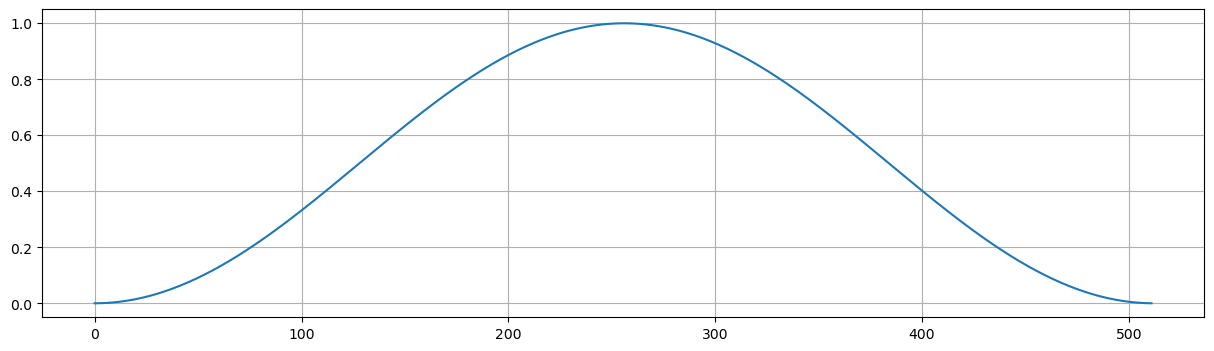

In [36]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)

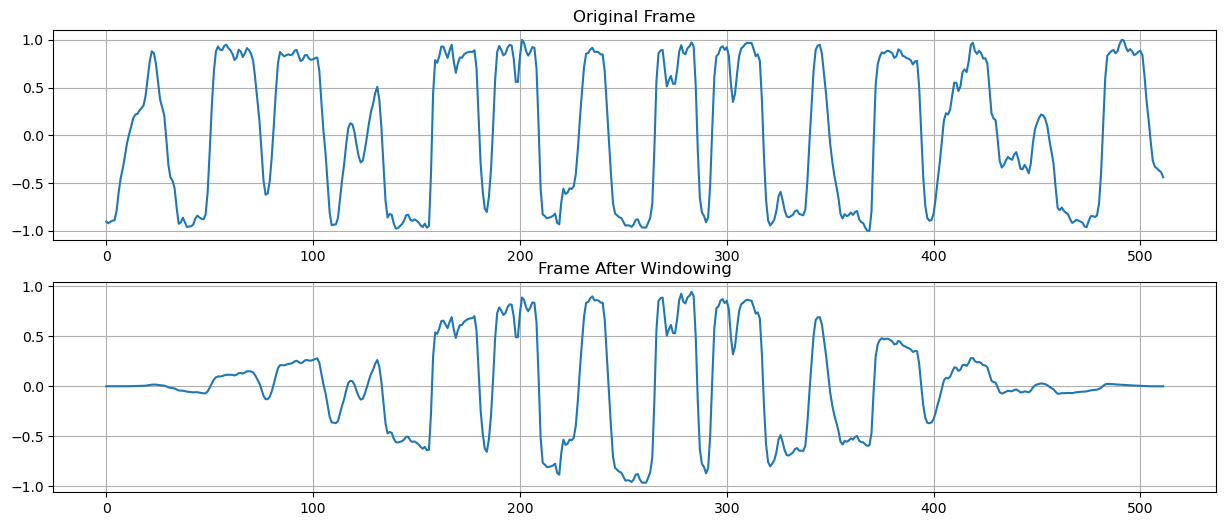

In [37]:
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

In [38]:
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [39]:
audio_power = np.square(np.abs(audio_fft))
print(audio_power.shape)

(250, 257)


In [40]:
freq_min = 0
freq_high = sample_rate / 2
mel_filter_num = 10

print("Minimum frequency: {0}".format(freq_min))
print("Maximum frequency: {0}".format(freq_high))

Minimum frequency: 0
Maximum frequency: 22050.0


In [41]:
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [42]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min: {0}".format(fmin_mel))
    print("MEL max: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = met_to_freq(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [43]:
filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=44100)
filter_points

MEL min: 0.0
MEL max: 3923.337321740179


array([  0,   3,   7,  12,  20,  31,  46,  66,  94, 132, 184, 256])

In [44]:
#Construct the filterbank
#After we have the filter points, we construct the filters.
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

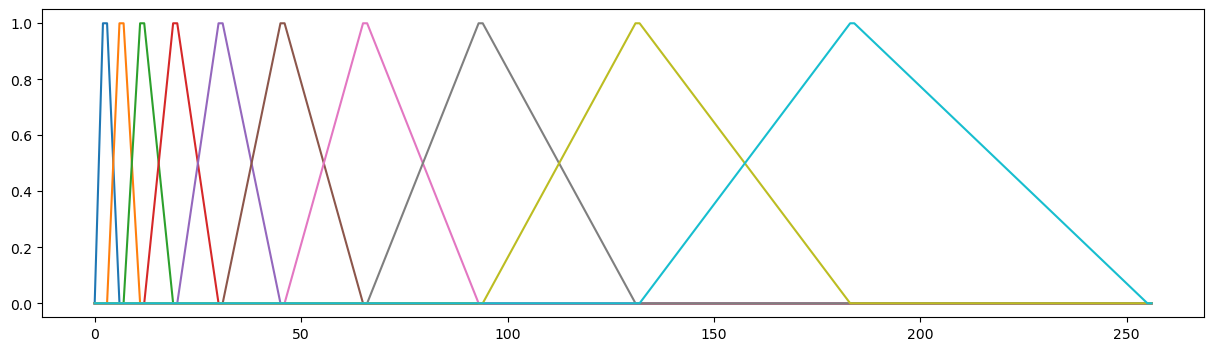

In [45]:
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [46]:
# taken from the librosa library
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]

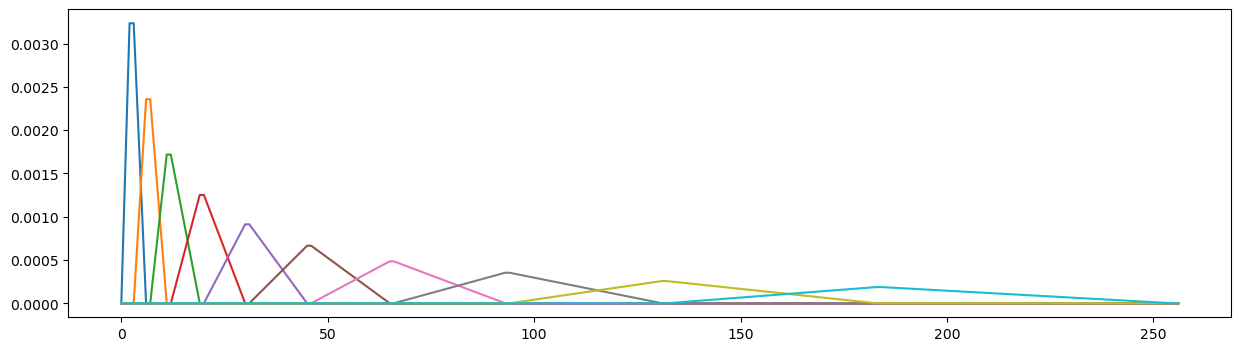

In [47]:
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [48]:
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

(10, 250)

In [49]:
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

In [50]:
dct_filter_num = 40
dct_filters = dct(dct_filter_num, mel_filter_num)
cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

(40, 250)

In [51]:
cepstral_coefficents[:, 0]

array([-8.05869803e+01,  1.88868728e+01,  6.03518484e+00,  1.19006161e+01,
        1.14107602e+00,  6.08470200e+00, -1.53740210e+00, -8.62615559e-01,
       -4.09438338e+00,  3.89612161e+00,  1.36234855e-13, -3.89612161e+00,
        4.09438338e+00,  8.62615559e-01,  1.53740210e+00, -6.08470200e+00,
       -1.14107602e+00, -1.19006161e+01, -6.03518484e+00, -1.88868728e+01,
        1.13967201e+02, -1.88868728e+01, -6.03518484e+00, -1.19006161e+01,
       -1.14107602e+00, -6.08470200e+00,  1.53740210e+00,  8.62615559e-01,
        4.09438338e+00, -3.89612161e+00, -8.44166786e-14,  3.89612161e+00,
       -4.09438338e+00, -8.62615559e-01, -1.53740210e+00,  6.08470200e+00,
        1.14107602e+00,  1.19006161e+01,  6.03518484e+00,  1.88868728e+01])

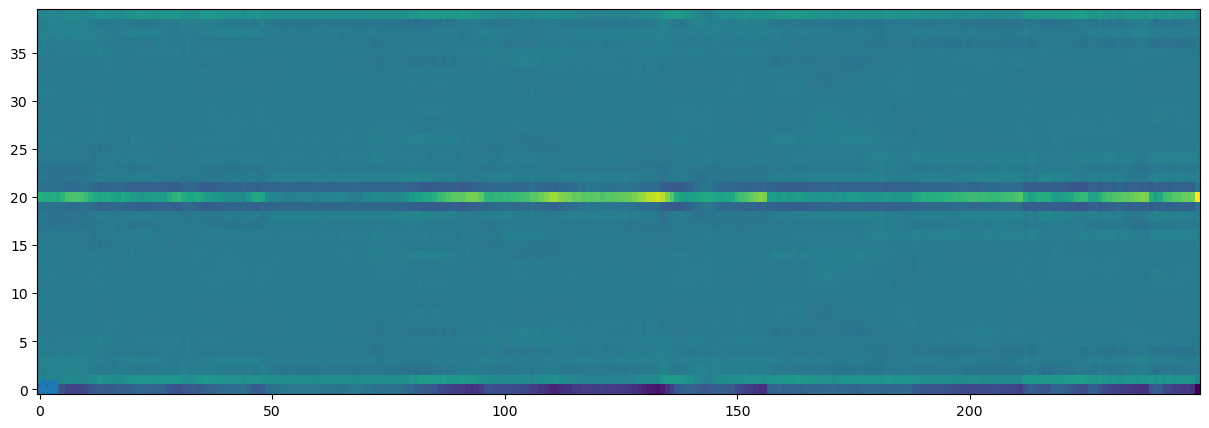

In [52]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower');

El MFCC es un buen algoritmo para extraer información de alta frecuencia y baja frecuencia, Los coeficientes cepstrales de frecuencia mel (MFCC), son una representación de características ampliamente utilizada en el procesamiento de señales de audio y reconocimiento del habla. Los MFCC se derivan del cepstrum.
Los MFCC capturan características relevantes del espectro de un sonido, al tiempo que reducen la dimensionalidad de los datos. Esto los hace útiles para aplicaciones de reconocimiento del habla y procesamiento de señales de audio, ya que pueden capturar información importante sobre la forma en que se distribuyen las energías de frecuencia en una señal de audio.

### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado. 

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
